In [1]:
from IPython.display import HTML
from dolfin import *
#import dijitso
#dijitso.set_log_level('debug')
import numpy
parameters["form_compiler"]["representation"] = "uflacs"
import matplotlib.pyplot as plt
%matplotlib inline
!cd ~/.cache/fenics && rm -r dijitso && cd -
#HTML(X3DOM().html(u))

/home/fenics/shared/trash


In [5]:
def error_calc(h, mesh_type, p_degree = 1):
    if mesh_type == 'tri':
        mesh = UnitSquareMesh(h, h)
    elif mesh_type == 'quad':
        mesh = UnitQuadMesh(mpi_comm_world(), h, h)
    elif mesh_type == 'tet':
        mesh = UnitCubeMesh(h, h, 5)
    elif mesh_type == 'hex':
        mesh = UnitHexMesh(mpi_comm_world(), h, h, 5)

    V = FunctionSpace(mesh, "Lagrange", p_degree)
    u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

    bc_boundary = CompiledSubDomain('near(x[0], 0) || near(x[1], 0) || near(x[0], 1) || near(x[1], 1)')
    
    f = -6

    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)

    a = dot(grad(u), grad(v))*dx
    L = f*v*dx

    bc = DirichletBC(V, u_D, bc_boundary)
    u = Function(V)
    solve(a == L, u, bc)
    
    grad_u_D = Expression(('2*x[0]', '4*x[1]', '0.0'), degree = 2)
    
    error = (u_D - u)**2*dx
    error1 = (grad_u_D - grad(u))**2*dx + (u_D - u)**2*dx
    l2 = sqrt(abs(assemble(error)))
    h1 = sqrt(abs(assemble(error1)))

    return l2, h1

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


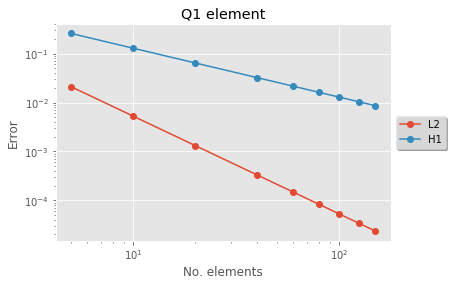

In [3]:
h_list = numpy.array([5, 10, 20, 40, 60, 80, 100, 125, 150])
L2_err = numpy.zeros((len(h_list), 1))
H1_err = numpy.zeros((len(h_list), 1))
for idx, h in enumerate(h_list):
    L2_err[idx], H1_err[idx] = error_calc(h, 'quad')

plt.style.use('ggplot')
plt.loglog(h_list, L2_err, 'o-', label='L2')
plt.loglog(h_list, H1_err, 'o-', label='H1')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
plt.xlabel("No. elements")
plt.ylabel("Error")
plt.title("Q1 element quad")

--- Instant: compiling ---


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


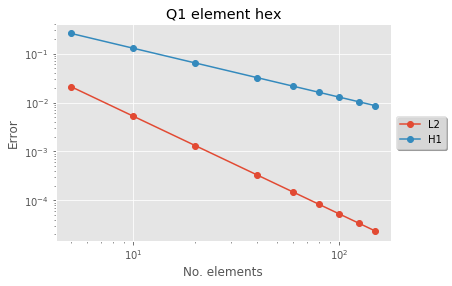

In [6]:
h_list = numpy.array([5, 10, 20, 40, 60, 80, 100, 125, 150])
L2_err = numpy.zeros((len(h_list), 1))
H1_err = numpy.zeros((len(h_list), 1))
for idx, h in enumerate(h_list):
    L2_err[idx], H1_err[idx] = error_calc(h, 'hex')

plt.style.use('ggplot')
plt.loglog(h_list, L2_err, 'o-', label='L2')
plt.loglog(h_list, H1_err, 'o-', label='H1')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
plt.xlabel("No. elements")
plt.ylabel("Error")
plt.title("Q1 element hex")